## COMPUTE AN ESTIMATOR (CLASSIFIER/REGRESSOR) 
#### with the dataset of your choice with the dataset of your choice https://archive.ics.uci.edu/ml/datasets.php

- define the task (classification/regression, candidate features, target, ...)
- load and preprocessing with pandas
- display with matplotlib.pyplot
- supervised learning with scikit-learn

## Send me the resulting classifier
https://scikit-learn.org/stable/modules/model_persistence.html
## with the dataset name, pipeline description, performance, and the portion of the dataset dedicated to the test.

In [148]:
# classic imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [132]:
# Get dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"
names=[ 'survival','still_alive','age-at-heart-attack','pericardial-effusion','fractional-shortening','epss','lvdd', "wall-motion-score", "wall-motion-index", "mult", "name", "group", "alive-at-1"]
df = pd.read_csv(url, names=names, na_values='?')

df

,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11.0,0.0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000,name,1,0.0
1,19.0,0.0,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588,name,1,0.0
2,16.0,0.0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000,name,1,0.0
3,57.0,0.0,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788,name,1,0.0
4,19.0,1.0,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1.0,64.0,0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
128,41.0,0.0,64.0,0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
129,36.0,0.0,69.0,0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
130,22.0,0.0,57.0,0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


# Preprocessing of data

In [134]:
# according to the description the features below are not usefull for classification
df.pop("group")
df.pop("name")
df.pop("mult")
df.pop("wall-motion-score")

df

,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
0,11.0,0.0,71.0,0,0.260,9.000,4.600,1.000,0.0
1,19.0,0.0,72.0,0,0.380,6.000,4.100,1.700,0.0
2,16.0,0.0,55.0,0,0.260,4.000,3.420,1.000,0.0
3,57.0,0.0,60.0,0,0.253,12.062,4.603,1.450,0.0
4,19.0,1.0,57.0,0,0.160,22.000,5.750,2.250,0.0
...,...,...,...,...,...,...,...,...,...
127,7.5,1.0,64.0,0,0.240,12.900,4.720,1.000,NaN
128,41.0,0.0,64.0,0,0.280,5.400,5.470,1.100,NaN
129,36.0,0.0,69.0,0,0.200,7.000,5.050,1.210,NaN
130,22.0,0.0,57.0,0,0.140,16.100,4.360,1.360,NaN


In [135]:
# removing patients that have survived less than one year but are still alive
df = df.loc[df.query("not (survival < 12 and still_alive == 1.0)").index]
df.shape

(98, 9)

## Deal with NaN values

In [136]:
df.isna().sum()

survival                  2
still_alive               1
age-at-heart-attack       4
pericardial-effusion      0
fractional-shortening     4
epss                     10
lvdd                      5
wall-motion-index         1
alive-at-1               46
dtype: int64

In [137]:
# visualize rows with NaN
for label in df.columns:
    display(df.loc[pd.isnull(df[label])])

,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,2.0
94,NaN,1.0,61.0,0,0.2,9.4,4.02,1.42,1.0


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,2.0


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,2.0
116,37.0,0.0,NaN,0,0.26,0.0,4.38,1.00,NaN
119,28.0,0.0,NaN,0,0.23,19.1,5.49,1.20,NaN
125,17.0,0.0,NaN,0,0.09,6.8,4.96,1.08,NaN


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
27,29.0,0.0,55.0,0,NaN,7.0,NaN,1.00,NaN
34,35.0,0.0,63.0,0,NaN,10.0,NaN,1.17,0.0
36,16.0,0.0,63.0,1,NaN,NaN,5.31,1.00,0.0
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,2.0


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
36,16.0,0.0,63.0,1,NaN,NaN,5.31,1.000,0.0
38,19.0,0.0,68.0,0,0.51,NaN,3.88,1.670,0.0
43,46.0,0.0,56.0,0,0.33,NaN,3.59,1.000,0.0
45,37.0,0.0,64.0,0,0.09,NaN,NaN,2.000,NaN
46,19.5,1.0,81.0,0,0.12,NaN,NaN,1.250,0.0
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,2.0
59,38.0,0.0,68.0,0,0.29,NaN,4.41,1.167,NaN
61,9.0,0.0,73.0,0,0.12,NaN,6.78,1.390,NaN
100,31.0,0.0,53.0,0,0.17,NaN,4.69,1.000,NaN
101,33.0,0.0,66.0,0,0.20,NaN,4.23,1.000,0.0


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
27,29.0,0.0,55.0,0,NaN,7.0,NaN,1.00,NaN
34,35.0,0.0,63.0,0,NaN,10.0,NaN,1.17,0.0
45,37.0,0.0,64.0,0,0.09,NaN,NaN,2.00,NaN
46,19.5,1.0,81.0,0,0.12,NaN,NaN,1.25,0.0
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,2.0


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
49,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,2.0


,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
24,48.0,0.0,64.0,0,0.190,5.90,3.48,1.110,NaN
25,29.0,0.0,54.0,0,0.300,7.00,3.85,1.667,NaN
26,29.0,0.0,35.0,0,0.300,5.00,4.17,1.000,NaN
27,29.0,0.0,55.0,0,NaN,7.00,NaN,1.000,NaN
33,27.0,0.0,47.0,0,0.400,5.12,3.10,1.000,NaN
39,31.0,0.0,80.0,0,0.410,5.40,4.36,1.000,NaN
45,37.0,0.0,64.0,0,0.090,NaN,NaN,2.000,NaN
52,10.0,0.0,57.0,0,0.240,14.80,5.26,1.380,NaN
59,38.0,0.0,68.0,0,0.290,NaN,4.41,1.167,NaN
61,9.0,0.0,73.0,0,0.120,NaN,6.78,1.390,NaN


In [138]:
def alive_oneyear(row):
    return 1 if row["still_alive"] != 0 and row["survival"] > 11.0 else 0

df['alive-at-1'] = df.apply(lambda row: alive_oneyear(row), axis=1)
df.isna().sum()

survival                  2
still_alive               1
age-at-heart-attack       4
pericardial-effusion      0
fractional-shortening     4
epss                     10
lvdd                      5
wall-motion-index         1
alive-at-1                0
dtype: int64

In [139]:
# df = df.dropna(thresh=2) # not working
# Manual method
df = df.drop(49) # too many missig values on this line
df = df.drop([27, 34, 36, 45, 46]) # more than 1 NaN on this lines
df.shape

(92, 9)

In [140]:
def complete_na(colname, df=df):
    mean_dead = df.loc[df["still_alive"] == 0.0][colname].mean()
    mean_alive = df.loc[df["still_alive"] == 1.0][colname].mean()
    print(mean_dead, mean_alive)
    df[colname] = df.apply(lambda row: fill_na(row, colname, mean_dead, mean_alive), axis=1)
    
def fill_na(row, colname, mean_dead, mean_alive):
    if pd.isnull(row[colname]):        
        return mean_alive if row["still_alive"] == 1.0 else mean_dead 
    return row[colname]

complete_na("survival")
complete_na("age-at-heart-attack")
complete_na("epss")

df.isna().sum()

29.976190476190474 23.571428571428573
61.098765432098766 63.625
10.565961538461542 16.375


survival                 0
still_alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-index        0
alive-at-1               0
dtype: int64

# Visualization

In [141]:
df.describe()

,survival,still_alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,alive-at-1
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,29.419255,0.086957,61.318438,0.141304,0.232663,11.071095,4.672304,1.270163,0.076087
std,11.934481,0.283315,7.737237,0.350244,0.108788,6.762280,0.826632,0.343308,0.266590
min,9.000000,0.000000,35.000000,0.000000,0.030000,0.000000,2.320000,1.000000,0.000000
25%,21.000000,0.000000,57.000000,0.000000,0.150000,6.600000,4.160000,1.000000,0.000000
50%,27.500000,0.000000,61.000000,0.000000,0.229000,9.750000,4.545000,1.140000,0.000000
75%,36.000000,0.000000,66.000000,0.000000,0.290000,13.300000,5.250000,1.394750,0.000000
max,57.000000,1.000000,80.000000,1.000000,0.610000,31.000000,6.780000,2.390000,1.000000


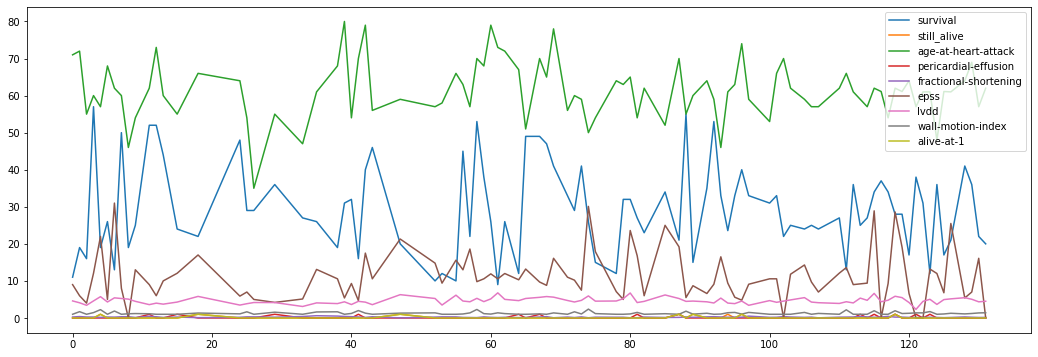

In [142]:
df.plot(
    figsize=(18,6)
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1a2044940>,
      dtype=object)

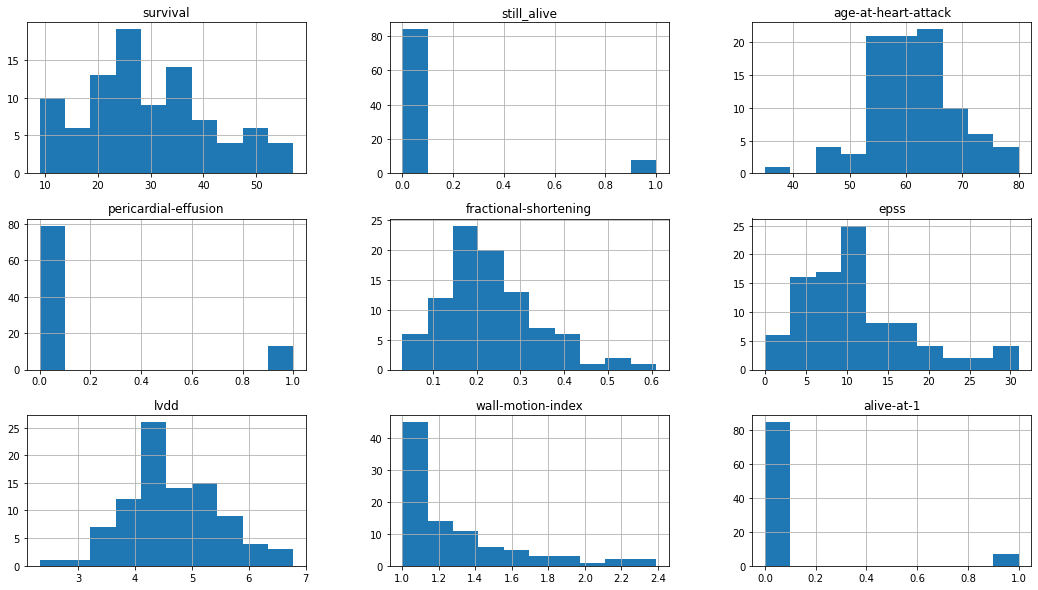

In [143]:
df.hist(figsize=(18,10))

In [150]:
np.unique(df["alive-at-1"], return_counts=True)

(array([0, 1]), array([85,  7]))

# Classification

In [184]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from interpret import show
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.data import ClassHistogram
from interpret.perf import ROC

In [203]:
x_labels = df.columns[3:-1]
y_label = df.columns[-1]
print(x_labels, y_label)

Index(['pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index'],
      dtype='object') alive-at-1


In [204]:
# Split dataset
X = df[x_labels]
y = df[y_label]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [205]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([63,  6]))

In [206]:
# fit model
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train.to_numpy(), y_train.to_numpy())

ExplainableBoostingClassifier(feature_names=['feature_0', 'feature_1',
                                             'feature_2', 'feature_3',
                                             'feature_4'],
                              feature_types=['categorical', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous'])

In [207]:
# Accuracy
ebm.score(X_test, y_test)

0.9565217391304348

In [208]:
cross_scores = cross_val_score(ebm, X, y, n_jobs=-1)
print(cross_scores)
print(f"Mean score for 5-fold validation is: {cross_scores.mean()*100:.1f}%")

[0.94736842 0.89473684 0.88888889 0.94444444 0.94444444]
Mean score for 5-fold validation is: 92.4%


In [215]:
y_pred = ebm.predict(df[x_labels])
confusion_matrix(df[y_label], y_pred)
[tn, fp], [fn, tp] = confusion_matrix(df[y_label], y_pred)
print(tn, fp, fn, tp)
print(f"False positive need to be very low this is the people we said are not dying within 1 year but are actually going to die.")
print(f"False Positive: {fp}")


85 0 2 5
False positive need to be very low this is the people we said are not dying within 1 year but are actually going to die.
False Positive: 0


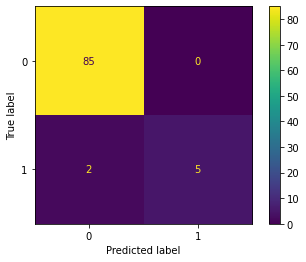

In [210]:
plot_confusion_matrix(ebm, X, y)

In [211]:
ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7001/140538355902496/ -->

In [212]:
hist_train = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
hist_test = ClassHistogram().explain_data(X_test, y_test, name = 'Test Data')

ebm_global = ebm.explain_global(name='EBM')

ebm_local = ebm.explain_local(X_test, y_test, name='EBM')

show([hist_train, hist_train, ebm_global, ebm_local, ebm_perf])

<!-- http://127.0.0.1:7001/140538399008256/ -->
 Open in new window

Result are not so good a lot of False Negative, but the dataset is very low and very unbalanced.

# Save classifier

In [213]:
from joblib import dump, load

In [214]:
dump(ebm, 'echocardiogram_ebm_STERLIN.joblib')

['echocardiogram_ebm_STERLIN.joblib']